In [79]:
!pip install -r requirements.txt | grep -v 'already satisfied'
%load_ext autoreload
%autoreload 2
from time import process_time as pt
import numpy as np
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set up values for:
- instrument
- id [kepler(KIC) or tess(TIC) id]
- modes (if modes are inexact, keep reading)

If need to use Lightkurve, specify:
- cadence (i.e. long,short)
and use the get_lc_data utility function.

*** In progress*** : If need to obtain more precise mode measurements, specify:
- rough_modes
and use the freq_finder utility function.


In [80]:
# ### *** Test Case 1 *** ###
# instrument = 'kepler'
# id = 7917485
# cadence = 'long'
# modes = [15.3830026,20.2628967]#,14.8566285,13.2848467,20.8047806,12.5678439,33.4488759,33.6880617,33.8063921,33.3423982]

In [87]:
## *** Test Case 2 *** ###
instrument = 'kepler'
id = '6780873'
cadence = 'long'
modes = [14.1876418,13.4363385]#,5.3963185,5.23778,5.7461348,5.8765071,5.0085266,6.210404,6.6661761,5.5258073]

In [88]:
import alg.utilities as util
time,flux = util.get_lc_data(id,instrument,cadence)

start = pt()
import alg.StellarRadio_alg
stellar_init = alg.StellarRadio_alg.StellarRadioAlg(instrument,id)
qs,ys,qmode,ymode = stellar_init.run_all_steps(time,flux,modes)
stop = pt()

cadence type: long
Calculating for f = 14.1876418
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Calculating for f = 13.4363385
Iteration 0
Iteration 1
Iteration 2
Iteration 3
done


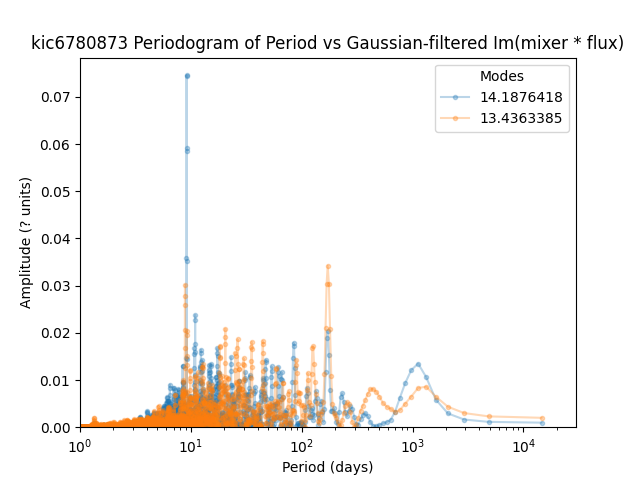

In [89]:
import alg.StellarRadio_plotting
plot_init = alg.StellarRadio_plotting.StellarRadioAlg_Plotting(instrument,id)
plot_init.final_lombscargle_plot(qs,ys,modes)

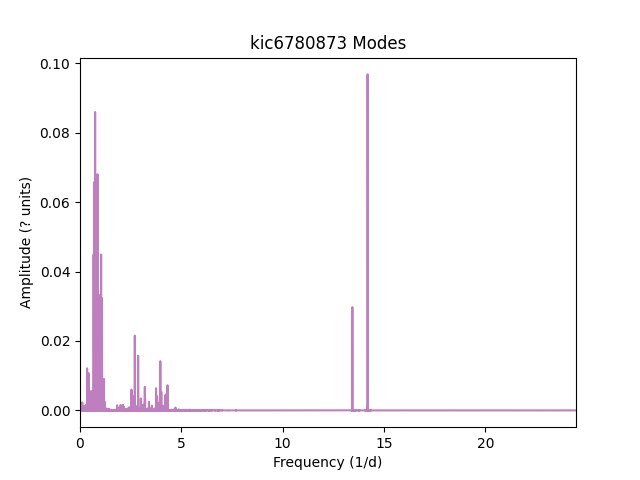

In [90]:
plot_init.modes_plot(time,qmode,ymode)

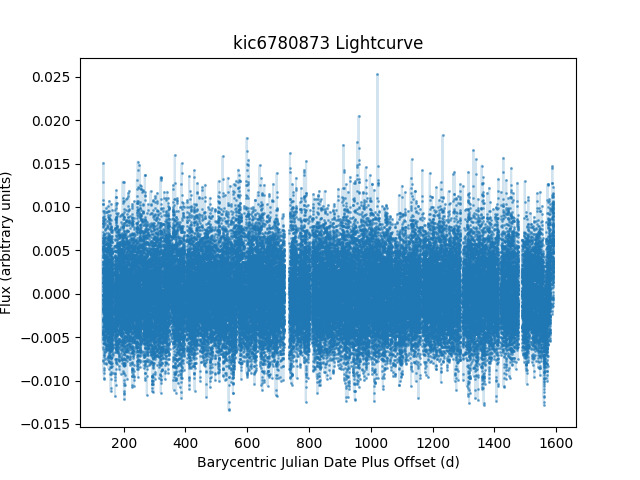

In [91]:
plot_init.lightcurve_plot(time,flux)

The following code was used for testing (testing via injection) on an older version of Phi-M Radio:

In [ ]:
# # choose parameters for injected frequency
# amp_fake = .0015 #flux units
# freq_fake = 70 + np.e/2 #inverse days
# phase_fake = 2 #0 to 2pi #radians
# planet_period_fake = 17.56 #days
# planet_amp_fake = 1e-3 #days -> this is about one second
# planet_phase_fake = 1 #radians

# print(amp_fake,freq_fake,phase_fake)

# distorted_time = time + planet_amp_fake * np.cos(2 * np.pi *time / planet_period_fake + planet_phase_fake) 
# flux_fake = flux + amp_fake * np.cos(2*np.pi *freq_fake * distorted_time + phase_fake)

# time,flux_fake,quarter,simmf = stellar_init.run_all_steps(injection_flux=flux_fake,qmin=65,qmax=80)

# plot_init.do_plots() #we expect a peak at 17.56 days!